In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
train_dir = "C:/Users/user/INTERN BHU/dataset2 lenet/Train"
validation_dir ="C:/Users/user/INTERN BHU/dataset2 lenet/Test"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(256, 256),
        shuffle=True,  
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        shuffle=True,
        batch_size=20,
        class_mode='binary')

Found 420 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam, Adadelta, Adagrad, Adamax

In [6]:
def lenet_model(activate = 'relu', drops=6*[0.5], lr=0.001):
    model = Sequential()
    
    model.add(layers.Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='valid',
                      input_shape=(256,256,3)))
    model.add(layers.Activation(activate))
    model.add(layers.AveragePooling2D(pool_size=(2,2)))
    
    model.add(layers.Dropout(drops[0]))
    
    model.add(layers.Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='valid'))
    model.add(layers.Activation(activate))
    model.add(layers.AveragePooling2D(pool_size=(2,2)))
    
    model.add(layers.Dropout(drops[1]))

    model.add(layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='valid'))
    model.add(layers.Activation(activate))
    model.add(layers.AveragePooling2D(pool_size=(2,2)))
    
    model.add(layers.Dropout(drops[2]))

    model.add(layers.Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='valid'))
    model.add(layers.Activation(activate))
    model.add(layers.AveragePooling2D(pool_size=(2,2)))
    
    model.add(layers.Dropout(drops[3]))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(1024))
    model.add(layers.Activation(activate))
    
    model.add(layers.Dropout(drops[4]))
    
    model.add(layers.Dense(64, activation=activate))
    
    model.add(layers.Dropout(drops[5]))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    opt = Nadam(lr)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [7]:
model = lenet_model(activate='tanh', drops=6*[0.7], lr=0.001)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 6)       456       
_________________________________________________________________
activation (Activation)      (None, 252, 252, 6)       0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 126, 126, 6)       0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 16)      2416      
_________________________________________________________________
activation_1 (Activat

In [8]:
history = model.fit_generator(
          train_generator,
          steps_per_epoch = 150,
          epochs=100,
          verbose=1,
          validation_data=validation_generator,
          validation_steps=44)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
21/21 [==============================] - 63s 3s/step - loss: 0.3905 - acc: 0.8500 - val_loss: 0.1477 - val_acc: 0.9714
Epoch 2/100
21/21 [==============================] - 52s 2s/step - loss: 0.0882 - acc: 0.9762 - val_loss: 0.0569 - val_acc: 0.9714
Epoch 3/100
21/21 [==============================] - 58s 3s/step - loss: 0.0666 - acc: 0.9738 - val_loss: 0.0701 - val_acc: 0.9714
Epoch 4/100
21/21 [==============================] - 52s 2s/step - loss: 0.1214 - acc: 0.9690 - val_loss: 0.2486 - val_acc: 0.9143
Epoch 5/100
21/21 [==============================] - 57s 3s/step - loss: 0.0604 - acc: 0.9881 - val_loss: 0.0344 - val_acc: 1.0000
Epoch 6/100
21/21 [==============================] - 56s 3s/step - loss: 0.0290 - acc: 0.9905 - val_loss: 0.1760 - val_acc: 0.9714
Epoch 7/100
21/21 [==============================] - 58s 3s/step - loss: 0.0105 - acc: 0.9976 - val_loss: 0.0779 - val_acc: 0.9429
Epoch 8/100
21/21 [================

21/21 [==============================] - 57s 3s/step - loss: 6.8218e-04 - acc: 1.0000 - val_loss: 0.0753 - val_acc: 0.9714
Epoch 39/100
21/21 [==============================] - 56s 3s/step - loss: 4.6700e-04 - acc: 1.0000 - val_loss: 0.0757 - val_acc: 0.9714
Epoch 40/100
21/21 [==============================] - 55s 3s/step - loss: 3.4602e-04 - acc: 1.0000 - val_loss: 0.0754 - val_acc: 0.9714
Epoch 41/100
21/21 [==============================] - 53s 3s/step - loss: 3.8924e-04 - acc: 1.0000 - val_loss: 0.1166 - val_acc: 0.9714
Epoch 42/100
21/21 [==============================] - 56s 3s/step - loss: 3.1918e-04 - acc: 1.0000 - val_loss: 0.1193 - val_acc: 0.9714
Epoch 43/100
21/21 [==============================] - 51s 2s/step - loss: 3.7968e-04 - acc: 1.0000 - val_loss: 0.1406 - val_acc: 0.9714
Epoch 44/100
21/21 [==============================] - 54s 3s/step - loss: 4.1045e-04 - acc: 1.0000 - val_loss: 0.0691 - val_acc: 0.9714
Epoch 45/100
21/21 [==============================] - 51s 2s/

21/21 [==============================] - 47s 2s/step - loss: 1.9981e-04 - acc: 1.0000 - val_loss: 0.2190 - val_acc: 0.9714
Epoch 77/100
21/21 [==============================] - 48s 2s/step - loss: 1.5992e-04 - acc: 1.0000 - val_loss: 0.2151 - val_acc: 0.9714
Epoch 78/100
21/21 [==============================] - 47s 2s/step - loss: 1.7041e-04 - acc: 1.0000 - val_loss: 0.2228 - val_acc: 0.9714
Epoch 79/100
21/21 [==============================] - 47s 2s/step - loss: 1.9884e-04 - acc: 1.0000 - val_loss: 0.2324 - val_acc: 0.9714
Epoch 80/100
21/21 [==============================] - 50s 2s/step - loss: 1.4185e-04 - acc: 1.0000 - val_loss: 0.2267 - val_acc: 0.9714
Epoch 81/100
21/21 [==============================] - 47s 2s/step - loss: 2.7358e-04 - acc: 1.0000 - val_loss: 0.2047 - val_acc: 0.9714
Epoch 82/100
21/21 [==============================] - 48s 2s/step - loss: 2.3952e-04 - acc: 1.0000 - val_loss: 0.1889 - val_acc: 0.9714
Epoch 83/100
21/21 [==============================] - 48s 2s/

In [9]:
# # Retrieve a list of accuracy results on training and validation data
# # sets for each training epoch

acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

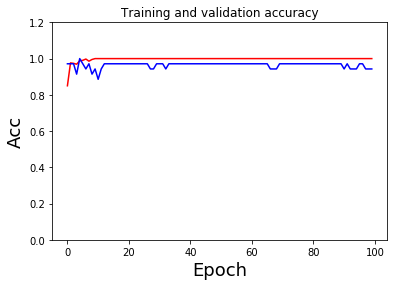

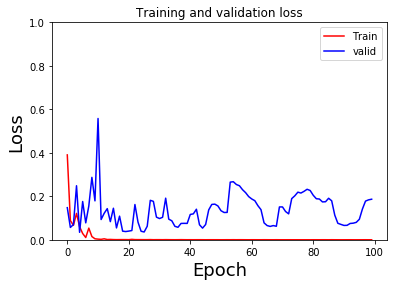

<Figure size 432x288 with 0 Axes>

In [27]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, scaley=False, color= 'red', label ='Train')
plt.plot(epochs, val_acc, scaley=False, color= 'blue', label= 'Valid')
plt.title('Training and validation accuracy')
plt.ylabel('Acc', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylim(0.0,1.2)
plt.figure()


# Plot training and validation loss per epoch
plt.plot(epochs, loss, scaley=False, color= 'red', label = 'Train')
plt.plot(epochs, val_loss, scaley=False, color= 'blue', label = 'valid')
plt.title('Training and validation loss')
plt.ylabel('Loss', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylim(0,1.0)
plt.legend()
plt.figure()

In [28]:
y_pred = model.predict(validation_dir)

AttributeError: 'str' object has no attribute 'shape'